In [1]:
import dlc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
h5_path =  '/Users/annateruel/st-anna-2022-09-27/videos'
data = dlc.load_data.read_all_data(h5_path, 5, 30)

In [3]:
bodyparts = ['nose', 'rightear', 'leftear', 'head', 'sp1', 'sp2', 'tail']

In [ ]:
df = dlc.data.get_centroid(data_dict = data, bodyparts = bodyparts)


In [4]:
df = data['AD22-112-testDLC_resnet50_stSep27shuffle1_200000_filtered.h5']


In [5]:
df2 = df.copy()

In [ ]:
DLCscorer = df2.columns[0][0]
threshold = 0.95
likelihood_col = (DLCscorer, 'nose', 'likelihood')
if df2[likelihood_col].lt(threshold).any():
    mask = df2[likelihood_col] < threshold

    df2.loc[mask, (DLCscorer, 'nose', 'x')] = np.nan
    df2.loc[mask, (DLCscorer, 'nose', 'y')] = np.nan

    df2[(DLCscorer, 'nose', 'x')] = df2[(DLCscorer, 'nose', 'x')].interpolate(method='linear')
    df2[(DLCscorer, 'nose', 'y')] = df2[(DLCscorer, 'nose', 'y')].interpolate(method='linear')

nose2 = df2.loc[:,(DLCscorer, 'nose', slice(None))]
nose2

In [10]:
nose = df.loc[:, (slice(None), 'nose', slice(None))]
nose

scorer    DLC_resnet50_stSep27shuffle1_200000                       
bodyparts                                nose                       
coords                                      x           y likelihood
0                                 1002.532349  457.551117   0.993708
1                                 1001.295205  456.103861   0.991869
2                                 1001.232800  456.157974   0.992140
3                                 1002.705266  458.789083   0.991000
4                                 1004.494050  460.725919   0.991364
...                                       ...         ...        ...
8995                               978.557626  245.846892   0.948090
8996                               959.365364  294.863719   0.835666
8997                               979.611303  234.518410   0.913713
8998                               962.217795  291.533529   0.889182
8999                               980.964605  233.356429   0.889001

[9000 rows x 3 columns]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(10, 10))

x = nose.loc[:, (slice(None), slice(None), 'x')].values
y = nose.loc[:, (slice(None), slice(None), 'y')].values
likelihood = nose.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()  # Flatten the array

# Create segments for LineCollection
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection object with segments and colormap
colormap = plt.cm.RdYlGn
lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
lc.set_array(likelihood)

ax.add_collection(lc)

# Add a colorbar to the plot to show what each color represents
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Likelihood Value')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()



/var/folders/q4/d9bmvghd77x_l961kcngf8_c0000gn/T/ipykernel_8197/3119057798.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


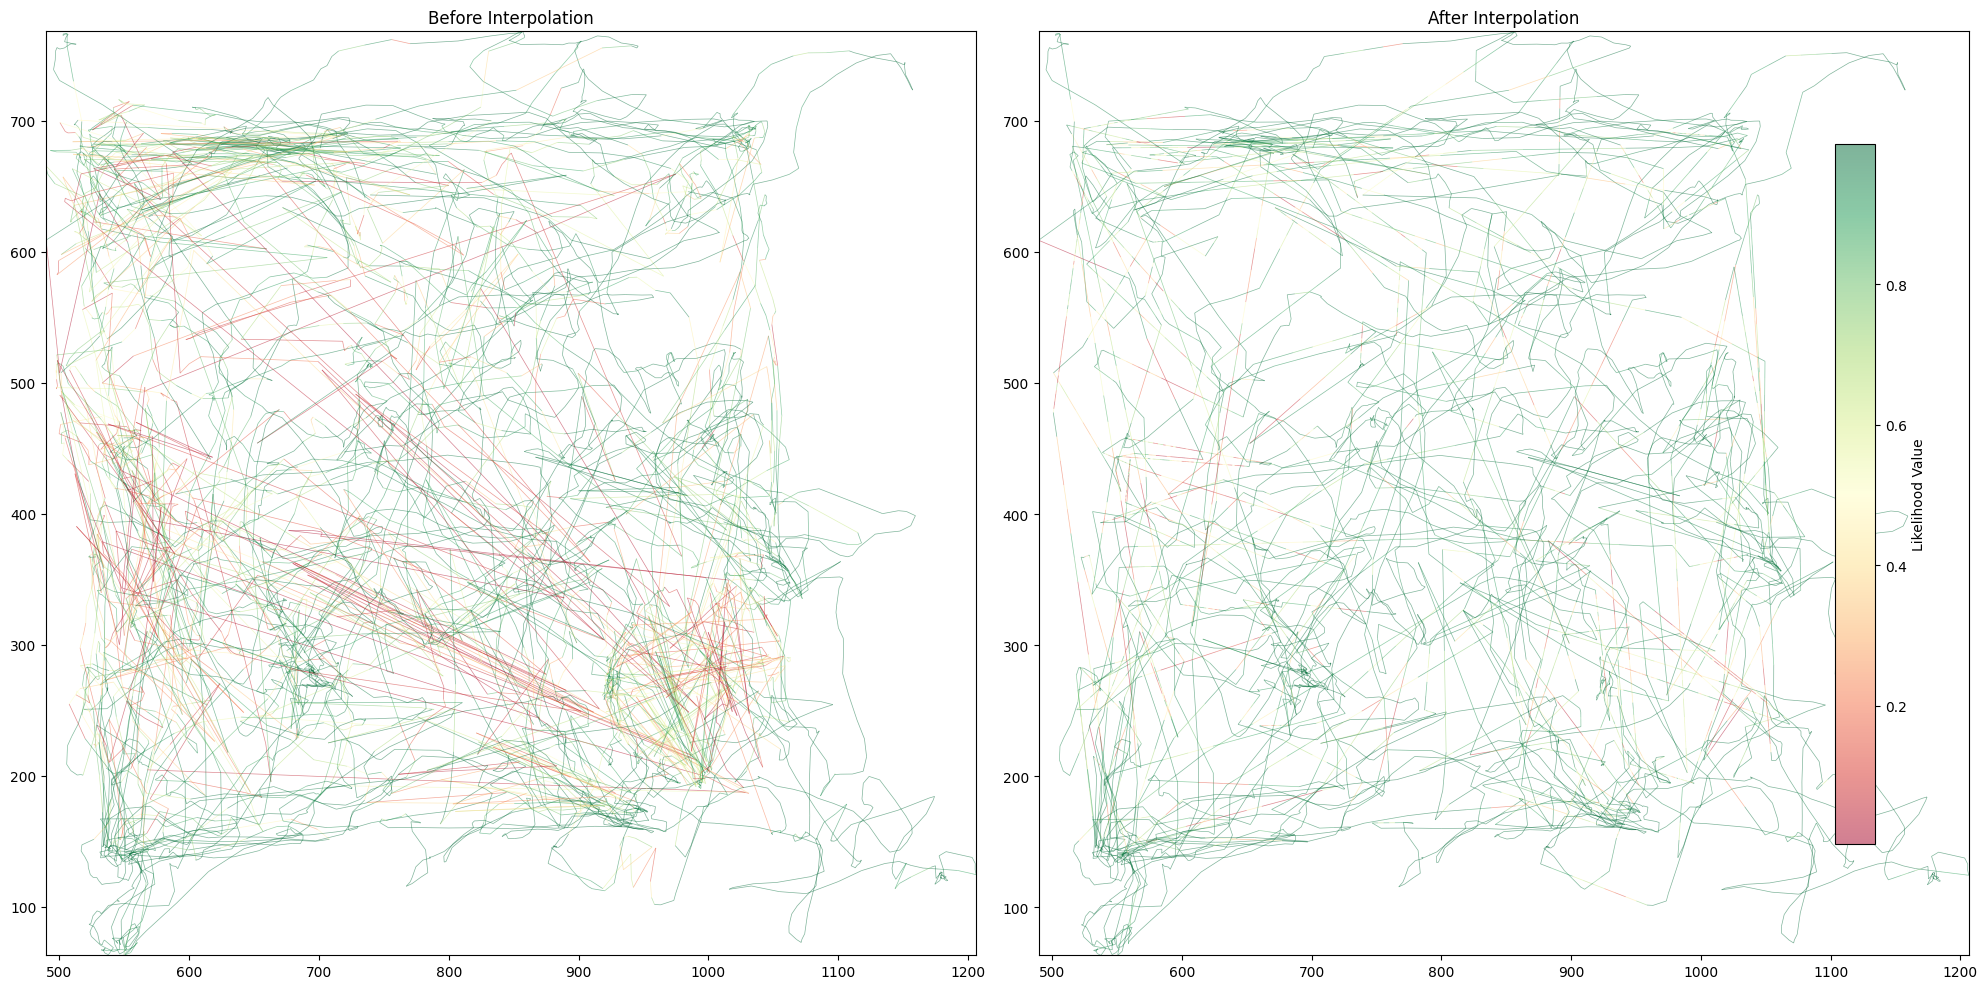

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_data(ax, data, title):
    x = data.loc[:, (slice(None), slice(None), 'x')].values
    y = data.loc[:, (slice(None), slice(None), 'y')].values
    likelihood = data.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()

    # Create segments for LineCollection
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection object with segments and colormap
    colormap = plt.cm.RdYlGn
    lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
    lc.set_array(likelihood)

    ax.add_collection(lc)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_title(title)
    
    return lc

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

lc1 = plot_data(ax1, nose, "Before Interpolation")
lc2 = plot_data(ax2, nose2, "After Interpolation")

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(lc2, cax=cbar_ax)
cbar.set_label('Likelihood Value')

plt.tight_layout()
plt.show()


In [1]:
from dlc.analysis.time_roi import ROIDrawer

In [2]:
video_path = '/Users/annateruel/Desktop/0_test.avi'
roi_drawer = ROIDrawer(video_path, num_rois=2)
r = roi_drawer.draw_rois()
r

Button clicked, processing ROIs...
ROI DataFrame assigned:    index   shape-type  vertex-index      axis-0      axis-1
0      0  add_ellipse             0  123.803866  150.377043
1      0  add_ellipse             1  123.803866  270.043256
2      0  add_ellipse             2  233.767414  270.043256
3      0  add_ellipse             3  233.767414  150.377043
4      1  add_ellipse             0  346.965183  153.611265
5      1  add_ellipse             1  346.965183  259.262516
6      1  add_ellipse             2  443.991842  259.262516
7      1  add_ellipse             3  443.991842  153.611265


In [4]:
print(r)

None
